In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import xlrd
xlsfile = pd.ExcelFile('SPEED.xls')

DF = xlsfile.parse('Sheet1')

In [4]:
input_vars = ['gender', 'samerace', 'attr', 'sinc', 'intel', 'fun', 'amb',
             'shar', 'like', 'dec', ]

In [5]:
df = DF.loc[:, input_vars]

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
features = df.drop(['dec'], axis=1)
target = df[['dec']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [11]:
#Train the scaler, which standardizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
#Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

#Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [13]:
#Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)

#Train the perceptron
ppn.fit(X_train_std, y_train)

C:\Users\SUUSER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
#Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = ppn.predict(X_test_std)

In [15]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.68


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
features = MinMaxScaler().fit_transform(features)

In [19]:
mlp = MLPClassifier(verbose=0, random_state=0, max_iter=40, nesterovs_momentum=False,
                   solver='sgd', learning_rate='invscaling', momentum=0.9, learning_rate_init=0.2)

In [20]:
mlp.fit(features,target)

C:\Users\SUUSER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SUUSER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='invscaling',
       learning_rate_init=0.2, max_iter=40, momentum=0.9,
       nesterovs_momentum=False, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [22]:
print("Training set score: %f" % mlp.score(features, target))
print("Training set loss: %f" % mlp.loss_)

Training set score: 0.747755
Training set loss: 0.553258


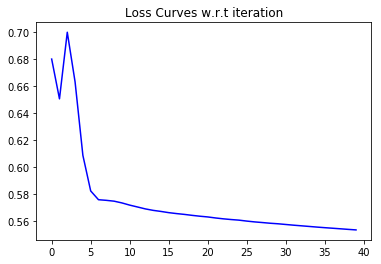

In [23]:
#plot the loss function
plt.title("Loss Curves w.r.t iteration")
plt.plot(mlp.loss_curve_, c='blue', linestyle='-')